In [1]:
using Flux
using Zygote

using Plots

### <span style="color:orange">write a function and make a function for the gradient of the function</span>

In [2]:
f1(x) = 3x^2 - 2x + 10 # the function
df1(x) = gradient(f1, x)[1] # the gradient function df/dx = 6x - 2
d2f1(x) = gradient(df1, x)[1] # acceleration d²f/dx² = 6

d2f1 (generic function with 1 method)

In [3]:
grad1 = df1(10) # gradient at 1 point
grads2 = df1.([1,2,10]) #gradient at multiple points
accelerations = d2f1.([1,2,10])
println("grad1 = $(grad1), grads2 = $(grads2), accelerations = $(accelerations)")

grad1 = 58.0, grads2 = [4.0, 10.0, 58.0], accelerations = [6.0, 6.0, 6.0]


### <span style="color:orange">We can find the gradient of a function with various computations inside and especially the well known MSE</span>

In [4]:
f_mse(x, y) = sum((x .- y).^2)

f_mse (generic function with 1 method)

In [5]:
xx = [2,1,0]
yy = [2,0,1]
grads = gradient(f_mse, xx, yy)
println("grads = $(grads)")

grads = ([0.0, 2.0, -2.0], [-0.0, -2.0, 2.0])


In [6]:
xx = [2,1,0]
yy = [2,0,1]
gs = gradient(Flux.params(xx, yy)) do
         f_mse(xx, yy)
        end

Grads(...)

In [7]:
fieldnames(typeof(gs))

(:grads, :params)

In [8]:
gs.grads

IdDict{Any, Any} with 4 entries:
  :(Main.xx) => [0.0, 2.0, -2.0]
  :(Main.yy) => [-0.0, -2.0, 2.0]
  [2, 1, 0]  => [0.0, 2.0, -2.0]
  [2, 0, 1]  => [-0.0, -2.0, 2.0]

In [9]:
gs.params

Params([[2, 1, 0], [2, 0, 1]])

In [10]:
gs[xx]

3-element Vector{Float64}:
  0.0
  2.0
 -2.0

In [11]:
gs[yy]

3-element Vector{Float64}:
 -0.0
 -2.0
  2.0

### <span style="color:orange">linear regression</span>

In [12]:
x, y = rand(5), rand(2) # 5 features (dims) -> 2 featuers (dims)
W = rand(2, 5)
b = rand(2)
m1(x) = W*x .+ b
function loss1(x, y)
    y_hat = m1(x)
    sum((y .- y_hat).^2)
end
loss1(x,y)

3.4035462155662675

In [13]:
gs = gradient(() -> loss1(x, y), Flux.params(W, b))

Grads(...)

In [14]:
gs[W]

2×5 Matrix{Float64}:
 0.989896  0.658552  0.783307  1.20489  0.215579
 2.6286    1.74874   2.08002   3.1995   0.572456

In [15]:
gs[b]

2-element Vector{Float64}:
 1.3003564836794808
 3.4530070775510735

In [16]:
W_grad = gs[W]

2×5 Matrix{Float64}:
 0.989896  0.658552  0.783307  1.20489  0.215579
 2.6286    1.74874   2.08002   3.1995   0.572456

### <span style="color:orange">Update parameter **W** (the transformation matrix) by a step</span>

In [17]:
W = W .- (0.1 .* W_grad )

2×5 Matrix{Float64}:
 0.502367  0.456226  0.372892   0.0759559  -0.00621648
 0.583897  0.603241  0.13208   -0.0196197   0.0207495

In [18]:
loss1(x,y)

1.1569178845818753

### <span style="color:orange">And another step in that direction</span>

In [19]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

0.09383935768301616

### <span style="color:orange">And another step</span>

In [20]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

0.21431063486969046

### <span style="color:orange">And another step</span>

In [21]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

1.518331716141899

### <span style="color:orange">Layers (sequential transformations)</span>

In [22]:
W1 = rand(3, 5) #5 to 3 transformation
b1 = rand(3)
layer1(x) = W1 * x .+ b1

W2 = rand(2, 3) #3 to 2 transformation
b2 = rand(2)
layer2(x) = W2 * x .+ b2

m2(x) = layer2(sigmoid.(layer1(x)))

m2(rand(5)) #transforming 5 to 3, then 3 to 2 dims with an activation layer of sigmoid 

2-element Vector{Float64}:
 1.4799407210745164
 2.6853903335246523

In [23]:
x, y = rand(5), rand(2)
function loss2(x, y)
    y_hat = m2(x)
    sum((y .- y_hat).^2)
end

loss2 (generic function with 1 method)

In [24]:
gs = gradient(() -> loss2(x, y), Flux.params(W1, b1, W2, b2))

Grads(...)

In [25]:
gs[W1]

3×5 Matrix{Float64}:
 0.169662  0.0980585  0.194919  0.0659817  0.161758
 0.271269  0.156784   0.311653  0.105497   0.258632
 0.637249  0.368308   0.732116  0.247827   0.607562

In [26]:
gs[W2]

2×3 Matrix{Float64}:
 1.9352   1.92324  1.62242
 4.18368  4.15783  3.50749

In [27]:
loss2(x, y)

6.153017752843563

In [28]:
W1_grad = gs[W1]
W2_grad = gs[W2]

2×3 Matrix{Float64}:
 1.9352   1.92324  1.62242
 4.18368  4.15783  3.50749

In [29]:
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 

2×3 Matrix{Float64}:
 -0.12678   0.293594  0.0912248
  0.209541  0.339868  0.478063

In [30]:
loss2(x, y)

1.7088285979204874

In [31]:
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 

2×3 Matrix{Float64}:
 -0.3203     0.101269   -0.0710174
 -0.208827  -0.0759156   0.127314

In [32]:
loss2(x, y)

0.029616470549416244

### <span style="color:orange">Let's make a **Chain** of transformations rather than separate transformations</span>

In [33]:
W1 = rand(3, 5) #5 to 3 transformation
b1 = rand(3)
W2 = rand(2, 3) #3 to 2 transformation
b2 = rand(2)

m3 = Chain( x -> W1 * x .+ b1 , x -> sigmoid.(x) , x -> W2 * x .+ b2 )  #processes each transformation in sequence

Chain(#7, #8, #9)

In [34]:
x, y = rand(5), rand(2)
function loss3(x, y)
    y_hat = m3(x)
    sum((y .- y_hat).^2)
end

loss3 (generic function with 1 method)

In [35]:
gs = gradient(() -> loss3(x, y), Flux.params(W1, b1, W2, b2))

Grads(...)

In [36]:
loss3(x, y)

2.972366210066568

In [37]:
W1_grad = gs[W1]
W2_grad = gs[W2]
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 
loss3(x, y)

1.1529557244833981

In [38]:
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 
loss3(x, y)

0.1879588990499561

### <span style="color:orange">Function composition</span>

- https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping
- https://math.libretexts.org/Courses/Western_Connecticut_State_University/Draft_Custom_Version_MAT_131_College_Algebra/03%3A_Functions/3.04%3A_Composition_of_Functions
- '\circ' is the operator symbol or use '|>' as a pipe

### <span style="color:orange">Use the **Dense Layer** function to make the transformations</span>

- the weights for the transformations are initialized automatically

In [39]:
#notice that the equivalence is produced from different orders of pipe VS compositions
println( 1:10 |> sum |> sqrt ) 
println( (sqrt ∘ sum)(1:10) )

7.416198487095663
7.416198487095663


In [40]:
m4 = Dense(3 => 2) ∘ Dense(5 => 3,sigmoid) 

Dense(3 => 2) ∘ Dense(5 => 3, σ)

In [41]:
# the weights and matrices are no longer supplied 'manually' but are part of the Dense layer object
x, y = rand(5), rand(2)
function loss4(x, y)
    y_hat = m4(x)
    sum((y .- y_hat).^2)
end
loss4(x, y)

3.333597088715595

In [42]:
opt = Descent(0.1)
params = Flux.params(m4)

Params([Float32[-0.9246504 -0.40359044 0.20740518; -0.57735413 -0.7178955 0.254862], Float32[0.0, 0.0], Float32[0.13879766 0.13076779 … 0.42068997 -0.7111993; -0.06201461 -0.67361426 … -0.031723574 0.5534653; 0.0050576427 -0.68233407 … -0.467941 -0.4030135], Float32[0.0, 0.0, 0.0]])

In [43]:
#use Flux's inbuilt api to get the gradients for the composite function

In [44]:
grads = Flux.gradient(params) do
    loss4(x, y)
end

Grads(...)

In [45]:
Flux.update!(opt, params, grads)

In [46]:
loss4(x, y)

1.1908452416927349

In [47]:
grads = Flux.gradient(params) do
    loss4(x, y)
end
Flux.update!(opt, params, grads)
loss4(x, y)

0.458928037749669

In [48]:
grads = Flux.gradient(params) do
    loss4(x, y)
end
Flux.update!(opt, params, grads)
loss4(x, y)

0.18168974324177178

### <span style="color:orange">Use the **Chain** to creat the sequence of transformations</span>

- notice how the order from right to left changes with 

In [49]:
m5 = Chain(  Dense(5 => 3, sigmoid) , Dense(3 => 2)  )

Chain(
  Dense(5 => 3, σ),                     # 18 parameters
  Dense(3 => 2),                        # 8 parameters
)                   # Total: 4 arrays, 26 parameters, 360 bytes.

In [50]:
# the weights and matrices are no longer supplied 'manually' but are part of the Dense layer object
x, y = rand(5), rand(2)
function loss5(x, y)
    y_hat = m5(x)
    sum((y .- y_hat).^2)
end
loss5(x, y)

0.09879426810960419

In [51]:
opt = Descent(0.1)
params = Flux.params(m5)

Params([Float32[-0.0782606 -0.6727774 … 0.5186444 0.7253689; -0.26564622 0.39393464 … -0.46368375 0.20492013; 0.32633793 -0.46941987 … -0.8291047 -0.6932451], Float32[0.0, 0.0, 0.0], Float32[-0.52176875 0.8295443 0.44255218; 0.48600182 -0.22171363 0.2184688], Float32[0.0, 0.0]])

In [52]:
grads = Flux.gradient(params) do
    loss5(x, y)
end

Grads(...)

In [53]:
Flux.update!(opt, params, grads)

In [54]:
loss5(x, y)

0.03674057651346195

### <span style="color:orange">Using a different optimizer **Adam**</span>

- Kingma, Diederik P., and Jimmy Ba. "Adam: A method for stochastic optimization." arXiv preprint arXiv:1412.6980 (2014).

In [55]:
m5 = Chain(  Dense(5 => 3, sigmoid) , Dense(3 => 2)  )

Chain(
  Dense(5 => 3, σ),                     # 18 parameters
  Dense(3 => 2),                        # 8 parameters
)                   # Total: 4 arrays, 26 parameters, 360 bytes.

In [56]:
# the weights and matrices are no longer supplied 'manually' but are part of the Dense layer object
x, y = rand(5), rand(2)
function loss5(x, y)
    y_hat = m5(x)
    sum((y .- y_hat).^2)
end
params = Flux.params(m5)
loss5(x, y)

0.325258532233035

In [57]:
opt = Adam(0.1)

Adam(0.1, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [58]:
grads = Flux.gradient(params) do
    loss5(x, y)
end

Grads(...)

In [59]:
Flux.update!(opt, params, grads)
loss5(x, y)

0.06451193841747808

In [60]:
#similar to before
m6 = Chain(  Dense(5 => 3, sigmoid) , Dense(3 => 2)  )
x, y = rand(5), rand(2)
function loss6(x, y)
    y_hat = m6(x)
    sum((y .- y_hat).^2)
end
opt = Adam(0.1)
loss6(x, y)

0.37320319439140714

### <span style="color:orange">Now we don't pass parameters of a model related to the loss, but just the variables related to the loss and the parameters are found automatically</span>

In [61]:
grads = gradient(Flux.params(x, y)) do
         loss6(x, y)
       end

Grads(...)

In [62]:
display(grads[x])
display(grads[y])

5-element Vector{Float64}:
  0.23046898710516756
 -0.1683397444846098
  0.11957989899694946
 -0.029095752016500526
 -0.007279261620637592

2-element Vector{Float64}:
  1.0059783586383964
 -0.6934120849226862

In [63]:
Flux.update!(opt, Flux.params(x, y), grads)
loss6(x, y)

0.19172840118175805

In [64]:
Flux.update!(opt, Flux.params(x, y), grads)
loss6(x, y)

0.11266742614772121

In [65]:
Flux.update!(opt, Flux.params(x, y), grads)
loss6(x, y)

0.09427239274824094

In [66]:
Flux.update!(opt, Flux.params(x, y), grads)
loss6(x, y)

0.1199266828430947

### <span style="color:orange">The Single Neuron Model</span>
**supervised learning**

Labeled data, D = $\{(x_1,y_2),(x_2,y_2),\ldots,(x_n,y_n)\}$

Each data point can be considered to be a 'signal' (common in the journal publications to see the data points referred to as) x_i

$x_i + 1 \rightarrow (w_1,b) \rightarrow z = w_1 * x_i + b \rightarrow a = \phi(z) $

Here $z$ can be considered to be a 'pre-activation' and $a$ a post-activation, that exists within the neuron. That is within the single neuron there are 2 steps, the production of $z$ that is a linear 'projection'/'transformation' and the $a$ is the 'activation' that is typically non-linear (eg. sigmoid or rectified linear units 'relu')

There is a 'cost' function for the neuron, in a manner similar to that of the common statistical fits

$C(w,b) = \sum_{i=1}^N dist(y,\hat{y}_i)$

The cost function gives us a 'landscape' (hyperdimensional surface of $y$ and $\hat{y}$ similarity for the parameters of the model) to minimize the cost (degree of fit). Our goal is to find $W$ and $b$ which minimizes $C$. The cost function can from a variety of forms based upon the 'dist' function where in regression cases it is often mean squared error, and in categorical predictions cross entropy

### <span style="color:orange">Dense Layer</span>

The **Dense** layer used corresponds to the $\phi$ function above that produces the non-linear *activation* operation upon the transformed values in *z*

In [67]:
rdata = rand( 5, 64)

5×64 Matrix{Float64}:
 0.248681  0.619632  0.00166739  0.472397   …  0.458362  0.650218  0.944641
 0.317246  0.846206  0.710969    0.751096      0.931728  0.295003  0.764373
 0.63367   0.990899  0.723795    0.0222604     0.346243  0.451888  0.944598
 0.421457  0.662853  0.790984    0.640749      0.124312  0.469222  0.45254
 0.8018    0.374226  0.579223    0.825099      0.484767  0.965368  0.183863

In [68]:
d1 = Dense(5 => 2)
d2 = Dense(5 => 2, identity)
d3 = Dense(5 => 2, sigmoid)
d4 = Dense(5 => 2, tanh)

Dense(5 => 2, tanh)  # 12 parameters

In [69]:
d1(rdata)

2×64 Matrix{Float64}:
  1.04283    1.56466     1.05424   …  0.971259   1.10362   1.59051
 -0.614901  -0.0564862  -0.635201     0.265972  -0.337814  0.365738

In [70]:
d2(rdata)

2×64 Matrix{Float64}:
 -0.394495  -1.11371   -0.654     …  -1.03311   -0.440168  -1.19717
  0.725834   0.445356   0.871988      0.520935   0.807629   0.0880134

In [71]:
d3(rdata)

2×64 Matrix{Float64}:
 0.755821  0.845125  0.788472  0.837282  …  0.767118  0.822068  0.83924
 0.285813  0.288959  0.269337  0.25345      0.254335  0.280608  0.340697

In [72]:
d4(rdata)

2×64 Matrix{Float64}:
 -0.856607  -0.944052  -0.830856  …  -0.665619  -0.92357   -0.950413
 -0.286419  -0.20894   -0.514283     -0.545985  -0.184105   0.0736512

In [73]:
d1( [0,1,10,100,1000] )

2-element Vector{Float32}:
  326.18564
 -674.86926

In [74]:
d3( [0,1,10,100,1000] )

2-element Vector{Float32}:
 1.0
 0.0

In [75]:
d4( [0,1,10,100,1000] )

2-element Vector{Float32}:
 -1.0
 -1.0

### <span style="color:orange">There are other layer types likes the **Conv** layer type (CNNs)</span>

- They follow the type: Width-Height-Channel-NumberOfImages (WHCN)
- for 32 color images of 50x50 pixels that has a WHCN size of (50,50,3,32)
- You can do CNN convolutional layers on 1D data too (sound / audio data) where there are 2 channels in stereo, and for let's say 72 samples(recordings) the size is (72, 2, 1)
- 3D Conv layers would add an extra dimension so if the 3D images (eg medical) are 50x50x50, that is (50,50,50,3,32)

- **Stride**: the CNN filters move/jump/reposition themselves how many pixels eeach time (the filter 'patch' is shifted how many pixels each time)
- **Padding**: due to edge boundaries the filters cannot produce the same image number of pixels (shrinks) are each application so many layers would shrink the image by alot. Also pixels on the boudnary/edge of the image get used in fewer filter operations than those in the middle areas. So padding adds 0 pixels on the outer perimeter. to maintain the same image size use

$paddingSize = \frac{f-1}{2}$

since

$n + 2p - f + 1 = n$

- **Dilation** widens the kernel by skipping pixels so the filter covers a wider area

functional usage: $Conv(filter, in => out, \sigma = identity; stride = 1, pad = 0, dilation = 1, groups = 1, [bias, init])$

In [76]:
conv_layer1 = Conv((5,5), 3 => 7, relu)

Conv((5, 5), 3 => 7, relu)  # 532 parameters

In [77]:
image1 = rand(Float32, 50, 50, 3, 1) #3 channel image (color)

50×50×3×1 Array{Float32, 4}:
[:, :, 1, 1] =
 0.964314   0.318368   0.483916   …  0.649836   0.410183   0.172161
 0.223538   0.911282   0.577506      0.232959   0.159465   0.675359
 0.765302   0.598426   0.770101      0.550623   0.866855   0.407651
 0.349827   0.462454   0.64233       0.551891   0.912977   0.858203
 0.357166   0.3863     0.80333       0.0801029  0.468604   0.192012
 0.0833232  0.925365   0.290821   …  0.329142   0.584178   0.595573
 0.864472   0.0162374  0.687803      0.056703   0.209485   0.208384
 0.470377   0.0704058  0.182768      0.41235    0.579324   0.268576
 0.404838   0.629865   0.344479      0.364903   0.236597   0.423569
 0.814027   0.643066   0.055529      0.0121582  0.326171   0.3938
 0.633809   0.421816   0.707949   …  0.0806138  0.740844   0.464184
 0.39672    0.491786   0.819279      0.278954   0.318158   0.0379305
 0.237204   0.948415   0.787249      0.425028   0.708082   0.40438
 ⋮                                ⋱                        
 0.699289   0.

### <span style="color:orange">Pass the image into the Conv layer but notice the size change of the image and the channel number increase</span>

In [78]:
size( conv_layer1(image1) )

(46, 46, 7, 1)

### <span style="color:orange">Add padding to this new Conv layer to see the size be preserved</span>

In [79]:
conv_layer2 = Conv((5,5), 3 => 7, relu, pad=2)

Conv((5, 5), 3 => 7, relu, pad=2)  # 532 parameters

In [80]:
size( conv_layer2(image1) )

(50, 50, 7, 1)

### <span style="color:orange">More will be said about different layers later on</span>

- BatchNorm
- Dropout

and more

### <span style="color:orange">Activation Functions</span>

- Between 'neurons'/'perceptrons'/'transformations'/'layers' we take the linear transformation, and produce an **activation** that is a non-linear tranformation. This is the linear tranformation value produced 'z' that is then tranformed with the non-linear activation function $\phi$ to produce the output $a$, from operations: $ z = w_1 * x_i + b \rightarrow a = \phi(z) $
- The activation function produces $ a = \phi(z) $
- If your 'layer' has only one dimension output $R^N \rightarrow R^1$ (with X input having $N$ dimension and only 1 neuron in that layer) then there is 1 activation function applied, but if there are more neurons in the layer, then multiple activation functions are applied, 1 for each neuron in the layer $R^N \rightarrow R^3$ 3 activation function applications
- These $\phi$ functions can be varied and are an area of research themselves. Although apparently simple in their operation, the consequences of the choices of these functions can change both the performance accuracies and even the performance run time
- Softmax is not *strictly* considered to be an *activation* function. We use softmax at the end output to get a probability distribution over a vector of outputs to produce another vector of outputs of the same length that then is a normalized distribution for categorical probability predictions.
- Many functions exist but we will cover a few major ones only, and you can even research your own functions yourself as novel functions and explore the pros and cons for each one

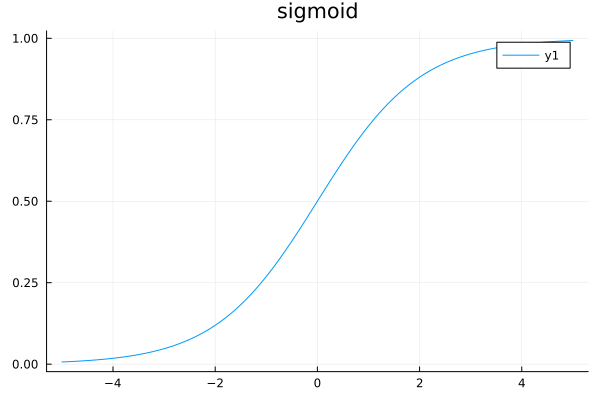

In [81]:
# 'σ' symbol or 'sigma' can be used for the sigmoid, σ(x) = 1 / (1 + exp(-x))
plot(-5:0.1:5,sigmoid,title="sigmoid")

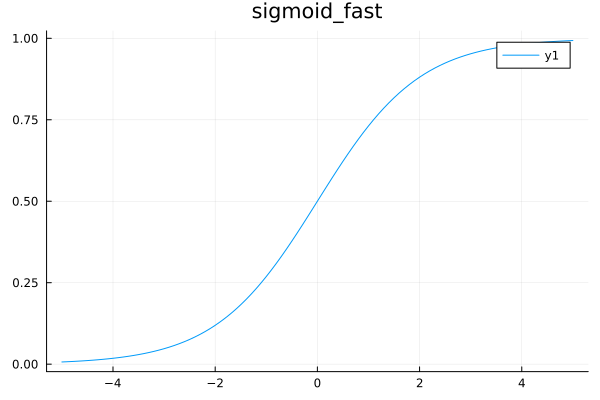

In [82]:
# sigmoid_fast is a faster less accurate version of the sigmoid
plot(-5:0.1:5,sigmoid_fast,title="sigmoid_fast")

### <span style="color:orange">Let's compare the running time of the normal sigmoid and the faster version using the convenient Julia macro @time</span>

In [83]:
rr = rand(10^6);
@time sigmoid.( rr );

  0.008577 seconds (4 allocations: 7.629 MiB)


In [84]:
@time sigmoid_fast.( rr );

  0.022468 seconds (834 allocations: 7.667 MiB, 65.77% compilation time)


In [85]:
# relu(x) = max(0, x) simple and powerful, very fast too
@time relu.( rr );

  0.036864 seconds (126.74 k allocations: 14.232 MiB, 92.46% compilation time)


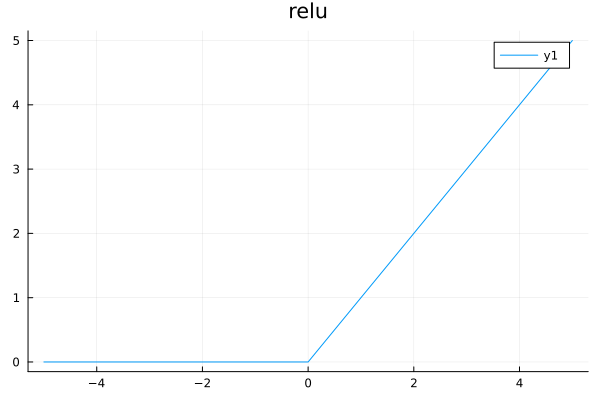

In [86]:
plot(-5:0.1:5,relu,title="relu")

In [87]:
# leakyrelu(x, a=0.01) = max(a*x, x) is like relu but without the hard zero setting in the left side of the zero
@time leakyrelu.( rr );

  0.069968 seconds (133.25 k allocations: 14.597 MiB, 43.44% gc time, 52.38% compilation time)


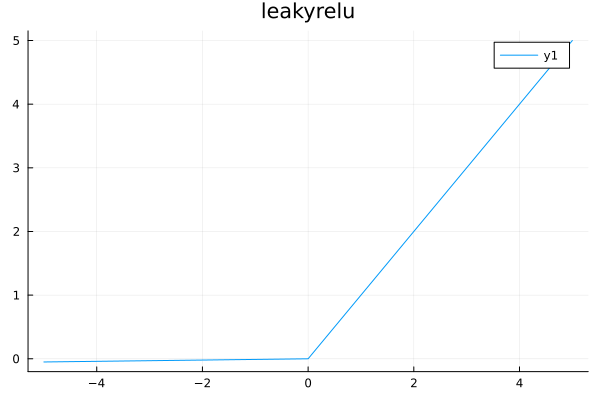

In [88]:
plot(-5:0.1:5,leakyrelu,title="leakyrelu")

### <span style="color:orange">tanh, is likely the first activation function explored, from Kunihito Fukushima in the Cognitron Model</span>

- it spans values from -1 to +1 but as a trigonometric function is more expensive to compute
- Julia reverts to a fast version and a 'hardtanh' stepwise version that is faster

In [89]:
@time tanh_fast.( rr );

  0.043436 seconds (131.40 k allocations: 14.293 MiB, 77.36% compilation time)


In [90]:
# hardtanh(x) = max(-1, min(1, x))
@time hardtanh.( rr );

  0.038246 seconds (128.37 k allocations: 14.370 MiB, 92.81% compilation time)


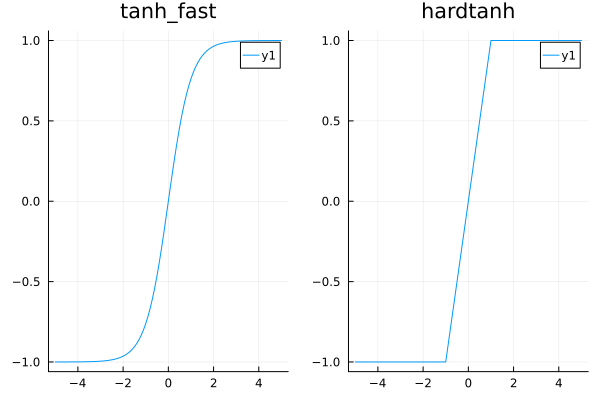

In [91]:
p1 = plot(-5:0.1:5,tanh_fast,title="tanh_fast")
p2 = plot(-5:0.1:5,hardtanh,title="hardtanh")
plot(p1,p2)

### <span style="color:orange">**Softmax**</span>

- After your input passes through multiple layers (transformations) the final layer can be treated in various ways
- If your goal is to do 'regression' that is predict continuous values, you can omit an activation function and omit a final non-linear transformation upon those last neurons
- If your goal is to do some categorical value prediction, like to predict an animal from an image, then each neuron output at the final layer will correspond to one of the selections as your target variables are **one hot encoded** pushing correct answers to be a value 1 on the correct neuron and a 0 on the rest. In the ideal fitted neural network your final outputs will be multiple 0s and a single 1 value for the category position. The neurons here will have activation functions (commonly), and then feed into a softmax.
- Softmax, takes a vector of values, and produces from a set of numbers a normalized vector of values. Normalized, meaning that the original set of number may not add to 1, but the normalized array (set of numbers) after using softmax will sum to 1. 
- The use of softmax is akin to taking the *max* in that there is preference for the values which are larger. You can consider the *max* function as a 'winner takes all* and the softmax amplifies the larger values in relation with the rest but does not completely disregard them. 
- The values of the softmax output can be taken as probabilities 
- The functional operation is akin to the *partition function* used in statistical mechanics

The operation is to take the exponential of each value and then divide that value by the sum of all the exponentiated values
- softmax(x) = exp.(x) ./ sum(exp.(x))

In [92]:
y_hat = [0.3, 0.2, 0.8]
softmax( y_hat )

3-element Vector{Float64}:
 0.28140804404603065
 0.2546285279891599
 0.4639634279648094

### add more elements to see the change, more possible candidates <u>dilute</u> the candidate choice

In [93]:
y_hat = [0.5, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.8]
softmax( y_hat )

10-element Vector{Float64}:
 0.12583465263342328
 0.11385990218827859
 0.08434949014611497
 0.08434949014611497
 0.08434949014611497
 0.08434949014611497
 0.08434949014611497
 0.08434949014611497
 0.08434949014611497
 0.16985901415549334

### the absolute difference in value (not only relative) matters in softmax

In [94]:
y_hat = [3, 2, 8]
softmax( y_hat )

3-element Vector{Float64}:
 0.006676412513376451
 0.0024561149044509535
 0.9908674725821726

In [95]:
y_hat = [5, 4, 1, 1, 1, 1, 1, 1, 1, 8]
softmax( y_hat )

10-element Vector{Float64}:
 0.04633571203449501
 0.0170459558495309
 0.0008486681692761852
 0.0008486681692761852
 0.0008486681692761852
 0.0008486681692761852
 0.0008486681692761852
 0.0008486681692761852
 0.0008486681692761852
 0.9306776549310407

### softmax can be applied to a matrix of values along the columns or the rows

- If we apply a NN to multiple inputs (eg, to many images) we received mulitpe final output layer results which independently need the softmax applied to them. These multiple outputs are commonly kept in a matrix (multidimensional array)
- These multiple NN outputs can be kept along the columns of the matrix or on the rows. If each indepdent output is a column of the matrix softmax must be applied to a specific column computing along the rows. analogously for the matrix storing the outputs along each row

In [96]:
y_hat = [1,2,3] #column
display(y_hat)
display( softmax( y_hat , dims=1 ) ) #results as expected as it moves along dim=1 (rows)
display( softmax( y_hat , dims=2 ) ) #results of all 1 since each row has 1 value along the columns (dim=2)

3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Float64}:
 0.09003057317038046
 0.24472847105479764
 0.6652409557748218

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [97]:
y_hat = [1 10 ; 2 20 ; 3 30] # 3x2 matrix
display(y_hat)
display( softmax( y_hat , dims=1 ) ) #along the rows for each column
display( softmax( y_hat , dims=2 ) ) #along the columns for each row

3×2 Matrix{Int64}:
 1  10
 2  20
 3  30

3×2 Matrix{Float64}:
 0.0900306  2.06106e-9
 0.244728   4.53979e-5
 0.665241   0.999955

3×2 Matrix{Float64}:
 0.000123395  0.999877
 1.523e-8     1.0
 1.87953e-12  1.0

### we use *softmax* as final layer output transformations, and not to activation functions between layers

In [98]:
#right and wrong
rdata = rand( 7 , 1 );

In [99]:
#works
d5 = Chain( Dense( 7=>3 , sigmoid ))
display( d5(rdata) )

3×1 Matrix{Float64}:
 0.5764759220093394
 0.7617959324717983
 0.4307001766972836

In [100]:
#does not work
d6 = Chain( Dense( 7=>3 , softmax ))
display( d6(rdata) )

LoadError: `softmax(x)` called with a number, but it expects an array. Usually this is because a layer like `Dense(3,4,softmax)` is broadcasting it like an activation function; `softmax` needs to be outside the layer.

In [101]:
#works by placing the softmax after the 'activation' which when empty is identity
d7 = Chain( Dense( 7=>3 ) , softmax )
display( d7(rdata) )

3×1 Matrix{Float64}:
 0.31530702204006406
 0.4468884444113666
 0.23780453354856934

In [102]:
#works by placing the softmax after the 'activation'
d7 = Chain( Dense( 7=>3 , hardtanh ) , softmax )
display( d7(rdata) )

3×1 Matrix{Float64}:
 0.565842024875295
 0.1868590381440328
 0.24729893698067218

### <span style="color:orange">DataLoader</span>

- It is convenient to feed data to the **train!** function via the DataLoader. **train!** updates the parameters according to the gradient and optimizer, and the DataLoader takes the dataset and passes in the tuples of data in the (x,y) or (features,target) variable format
- It is similar in concept to how R xgboost uses can package the training data 
- DataLoader can be used to produce 'batches' (mini-batches) of data so that the gradient is not based upon the full 
- The DataLoader can be used in multiple ways and there are different uses in conjunction with the training schemes
- DataLoader(data; [batchsize, buffer, collate, parallel, partial, rng, shuffle])
- Takes as input a single data array, a tuple (or a named tuple) of arrays, *the last dimension in each array is the observation dimension*
- Default batchsize is 1
- can be made to run batches in parallel

### <span style="color:orange">In Flux **features span rows**</span>

In [105]:
#check the sizes of the batches
Xtrain = rand(10, 100);
array_loader = Flux.DataLoader(Xtrain, batchsize=20);
for mbatch in array_loader
    display( size(mbatch) )
end

(10, 20)

(10, 20)

(10, 20)

(10, 20)

(10, 20)

In [154]:
Xtrain = rand(10, 100);
Ytrain = rand(["a","b","c"], 100);
#just like with R's XGBoost we can set the data and label and then have the data and label in each batch
train_loader = Flux.DataLoader((data=Xtrain, label=Ytrain), batchsize=5);
for batch in train_loader
    println( size(batch.data) )
    println( size(batch.label) )
end

(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)


In [157]:
Xtrain = rand(10, 100);
Ytrain = rand(["a","b","c"], 100);
train_loader = Flux.DataLoader((data=Xtrain, label=Ytrain), batchsize=5);
#we can 'destructure' the batch of the data and label at the start of the loop
for (Xdata, Ylabel) in train_loader
    println( size(Xdata) )
    println( size(Ylabel) )
end

(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)
(10, 5)
(5,)


In [161]:
Xtrain = rand(10, 100);
Ytrain = rand(["a","b","c"], 100);
train_loader = Flux.DataLoader((data=Xtrain, label=Ytrain), batchsize=5 , shuffle=true);
#we can 'destructure' the batch of the data and label at the start of the loop
#we perform multiple passes via epochs for the training scheme
for epoch in 1:5
    for (Xdata, Ylabel) in train_loader
        @assert size(Xdata) == (10, 5)
        @assert size(Ylabel) == (5,)
    end
    println("epoch num: $(epoch)")
end

epoch num: 1
epoch num: 2
epoch num: 3
epoch num: 4
epoch num: 5


In [ ]:
### <span style="color:orange"></span>

In [ ]:
#!!!!!!!xxxxx

### <span style="color:orange">Look at a simple function to 'fit'</span>

In [2]:
function target_function(x)
    4x + 2
end

target_function (generic function with 1 method)

### <span style="color:orange">training and testing data</span>

In [3]:
x_train, x_test = hcat(0:5...), hcat(6:10...)

([0 1 … 4 5], [6 7 … 9 10])

In [4]:
y_train, y_test = target_function.(x_train), target_function.(x_test)

([2 6 … 18 22], [26 30 … 38 42])

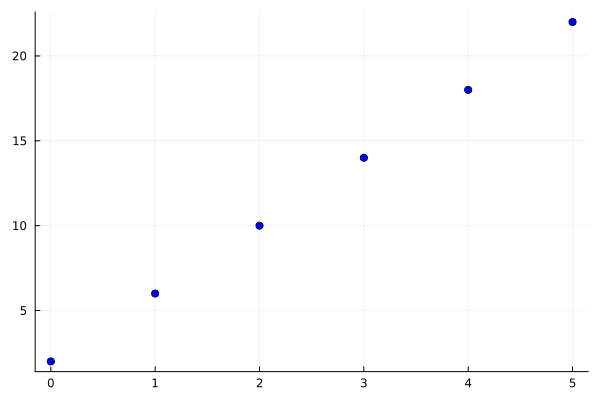

In [5]:
plot(x_train, y_train, legend=false, linetype="scatter", color="blue")

### <span style="color:orange">Produce a dense layer of 1 element, a 1 to 1 transformation</span>

The Dense function produces a **dense** layer of connections between the neurons (input dimensions). The first argument is the input dimension (input feature size) and the second value is the output dimension (output layer feature size)

In [6]:
model = Dense(1,1)

Dense(1 => 1)       # 2 parameters

In [7]:
typeof(model)

Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}

In [8]:
fieldnames(typeof(model))

(:weight, :bias, :σ)

In [9]:
model.weight

1×1 Matrix{Float32}:
 1.5517563

In [10]:
model.bias

1-element Vector{Float32}:
 0.0

In [11]:
model.σ

identity (generic function with 1 method)

### <span style="color:orange">See what the random untrained model parameters produce for the model outputs</span>

In [12]:
model(x_train)

1×6 Matrix{Float32}:
 0.0  1.55176  3.10351  4.65527  6.20703  7.75878

In [13]:
loss(x,y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

### <span style="color:orange">Current loss of the model and its randomly initialized parameters</span>

In [14]:
loss(x_train,y_train)

83.42649f0

### <span style="color:orange">Define an optimizer to change the parameters according the loss function</span>

The step size is the $\eta$ argument/parameter value

there is also the popular alternative of **ADAM**

In [15]:
opt = Flux.Descent(0.05) #non-stochastic

Descent(0.05)

### <span style="color:orange">package the data into 'tuples' that makes it easy to send to the learning scheme</span>

This follows the feature and target pairing of the fundamental nature of the supervised learning scheme

In [16]:
data = [(x_train, y_train)] #array of tuples

1-element Vector{Tuple{Matrix{Int64}, Matrix{Int64}}}:
 ([0 1 … 4 5], [2 6 … 18 22])

In [17]:
parameters = Flux.params(model)

Params([Float32[1.5517563;;], Float32[0.0]])

### <span style="color:orange">Train the model parameters now</span>

The training uses the gradient from the optimizer to change the parameters so that the model loss is reduced (descent of the loss)

In [18]:
println("loss original = $(loss(x_train,y_train))")

Flux.train!(loss, parameters, data, opt)

println("loss after training = $(loss(x_train,y_train))")

loss original = 83.42649
loss after training = 0.4562064


In [19]:
model.weight

1×1 Matrix{Float32}:
 4.29598

In [20]:
model.bias

1-element Vector{Float32}:
 0.81206095

### <span style="color:orange">Let us redo the learning scheme but differently this time</span>

In [21]:
model = Dense(1,1)

Dense(1 => 1)       # 2 parameters

In [22]:
model.weight

1×1 Matrix{Float32}:
 -1.2775202

In [23]:
model.bias

1-element Vector{Float32}:
 0.0

In [24]:
parameters = Flux.params(model)

Params([Float32[-1.2775202;;], Float32[0.0]])

In [25]:
loss(x_train,y_train)

312.0872f0

In [26]:
rand(1:20) #get a random number from the range

7

### <span style="color:orange">Use the Stochastic approach (faster) as the gradient for each data point is not being calculated</span>

In [27]:
println("loss original = $(loss(x_train,y_train))")

(mm,nn) = size(x_train)
println(size(x_train))
for epoch in 1:1_000
    ii = rand(1:nn)
    data = [(x_train[:,ii],y_train[:,ii])]
    Flux.train!(loss, parameters, data, opt)
end

println("loss after training = $(loss(x_train,y_train))")

loss original = 312.0872
(1, 6)
loss after training = 3.031649e-13


In [28]:
model.weight

1×1 Matrix{Float32}:
 3.9999998

In [29]:
model.bias

1-element Vector{Float32}:
 2.000001

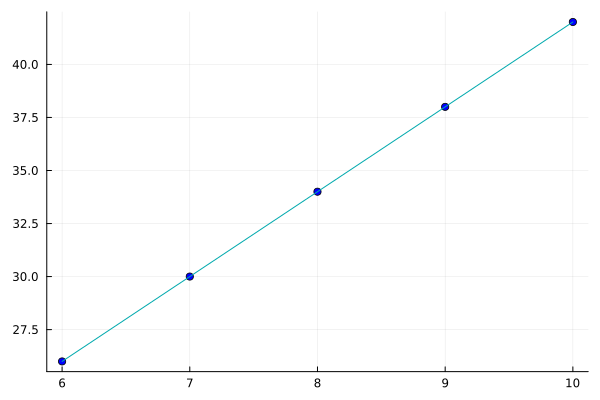

In [30]:
plot(x_test, y_test, legend=false, linetype="scatter", color="blue")
domain = LinRange(6,10,100)
plot!(domain, domain .* model.weight .+ model.bias, legend=false)

### <span style="color:orange">Let's make a set of **predictions** from the model</span>

In [31]:
model([7 8 .5 100])

1×4 Matrix{Float64}:
 30.0  34.0  4.0  402.0

### <span style="color:orange">Let us look at the same problem in a slightly different approach</span>

- Flux assumes that the features span the 'rows' and not the columns, meaning that each column is a data point. 
- We often use a **DataLoader** object to encapsulate the features and targets and set the batch size for the SGD
- The Adam optimizer is very popular and well known as it handles 'momenta'

In [38]:
#hcat makes sure that this x data is a row and not a default column
x_train, x_test = hcat(rand(1:100,20)...), hcat(rand(1:100,20)...)
y_train, y_test = target_function.(x_train), target_function.(x_test)

([222 374 … 366 70], [162 146 … 130 74])

In [39]:
W = rand()
b = rand()
model1(x) = W*x .+ b
function loss1(x,y)
    y_hat = model1.(x)[1]
    sum((y .- y_hat).^2)
end
pars = Flux.params(model1)
opt = Flux.Adam(0.01)      # will store optimiser momentum
loader = Flux.DataLoader( (x_train, y_train) , batchsize=2, shuffle=true )

MLUtils.DataLoader{Tuple{Matrix{Int64}, Matrix{Int64}}, Random._GLOBAL_RNG, Val{nothing}}(([55 93 … 91 17], [222 374 … 366 70]), 2, false, true, true, false, Val{nothing}(), Random._GLOBAL_RNG())

In [40]:
for (x,y) in (x_train,y_train)
    println(x," ",y)
end

55 93
222 374


In [34]:
for epoch in 1:1_000
    for (x, y) in loader
        y_hat = model1(x)
        loss1(y, y_hat)
        Flux.train!(loss1, pars, (x,y), opt)
    end
end

LoadError: MethodError: no method matching loss1(::Matrix{Int64})
[0mClosest candidates are:
[0m  loss1(::Any, [91m::Any[39m) at In[33]:4

In [101]:
#plot(losses)

In [102]:
W

0.18349628499663506

In [32]:
### <span style="color:orange"></span>
### <span style="color:orange"></span>


### <span style="color:orange">produce some ground truth parameters</span>

In [36]:
W_truth = [1 2 3 4 5]
display( W_truth )

2×5 Matrix{Int64}:
 1  2  3  4  5
 5  4  3  2  1

In [38]:
b_truth = [ -2.0 ]
display( b_truth )

1-element Vector{Float64}:
 -2.0

### <span style="color:orange">produce a ground truth model to produce data</span>

In [12]:
ground_truth_model(x) = (W_truth * x) .+ b_truth

ground_truth_model (generic function with 1 method)

### <span style="color:orange">produce some *training feature* data</span>

In [145]:
NN = 10^3
x_train = [ 5 .* rand(5) for _ in 1:NN ]
println( size( x_train ) )
display( x_train[1:4] )

(1000,)


4-element Vector{Vector{Float64}}:
 [2.1208584464907614, 4.163429508817119, 1.7837581819243453, 4.191883360153838, 0.9090654523496511]
 [2.5236466993444058, 0.5522780451803794, 4.308994851030602, 3.5725598676226236, 2.2233108849818866]
 [1.0168668447179057, 4.720139202172423, 0.0335506960345161, 4.052071949031639, 1.5691063438533743]
 [1.537624116410331, 1.7997210953088234, 4.538404390194335, 0.5282918858982111, 1.1087434807820133]

### <span style="color:orange">produce some *training target* data</span>

In [146]:
y_train = [ ground_truth_model(x) + 0.2 .* randn(2) for x in x_train ]
println( size( y_train ) )
display( y_train[1:4] )

(1000,)


4-element Vector{Vector{Float64}}:
 [35.982321957464244, 39.91723968690263]
 [40.89538747080707, 35.14593318607259]
 [33.78056442140868, 31.656362480792733]
 [25.634360399374426, 28.4468328996352]

### <span style="color:orange">define the model</span>

In [147]:
model_to_fit(x) = W1*x .+ b1

model_to_fit (generic function with 1 method)

### <span style="color:orange">Initialize the model parameters</span>

In [189]:
W1 = rand( 2, 5 ) .+ 10
b1 = rand( 2 ) .+ 10

2-element Vector{Float64}:
 10.27977596938496
 10.752576902079465

### <span style="color:orange">define the loss function</span>

In [190]:
function loss1( x, y )
    y_hat = model_to_fit( x ) #y_hat is our prediction based upon the model given the current value of the parameters 
    sum( ( y .- y_hat ).^2 ) #this is the sum of squared errors (SSE) of the prediction for these parameter values
end

loss1 (generic function with 1 method)

### <span style="color:orange">set the optimizer for parameter for the gradients</span>

In [191]:
opt = Flux.Adam(0.01) # an alternative is >Descent(0.01)< 

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

### <span style="color:orange">get the parameters of the model which need to be optimized</span>

In [192]:
ps = Params( [model_to_fit] ) # Params is part of Zygote.jl, as Zygote allows a dictionary style retrieval of the parameter variables
#alternative forms are >Params([W1,b1])< , using flux >Flux.params(W1, b1)< or >Flux.params(model_to_fit)<

Params([model_to_fit])

### <span style="color:orange">We can calculate the loss for each setting of the parameters which is needed to find the **gradient** </span>

In [193]:
gs = gradient( Params([W1,b1]) ) do #using Zygote.jl
    l1 = loss1(x_train[1],y_train[1])
    println(l1)
    return l1
end

24237.961876376605


Grads(...)

In [194]:
gs[W1]

2×5 Matrix{Float64}:
 479.536  941.371  403.316  947.805  205.544
 454.025  891.29   381.86   897.381  194.609

In [195]:
gs[b1]

2-element Vector{Float64}:
 226.10475919027664
 214.07588695837143

In [196]:
gs = gradient(Flux.params(x_train, y_train)) do #using Flux.jl
    l1 = loss1(x_train[1],y_train[1])
    println(l1)
    return l1
end

24237.961876376605


Grads(...)

In [197]:
train_data = zip( x_train, y_train )

ps = Flux.params( model_to_fit )

loss_log = []

for (x,y) in train_data
    gs = gradient( ps ) do #using Flux.jl
        l1 = loss1(x,y)
        Zygote.ignore_derivatives() do # code in this 'block' is not part of the differentiated set (not part of the optimization)
            push!(loss_log, l1)
        end
        return l1
    end
    Flux.Optimise.update!(opt, ps, gs)
end

In [198]:
loss_log

1000-element Vector{Any}:
 24237.961876376605
 24093.623717882045
 18884.228937818887
 13464.934682025541
  9472.990301449478
 31403.13484342039
 16700.79033210296
 15297.859388950936
 13660.081499067375
 12317.934664637005
 18941.627383771804
 16515.51335477688
 22488.66343331941
     ⋮
 22173.70908233695
  8887.247844694572
 37537.70818517936
 31591.92454538282
 17988.07626468913
 29712.204483713125
 37370.469458890584
 19132.197662348208
 26474.38283523103
 15120.480969724633
 36310.313945297996
 26813.532422541026

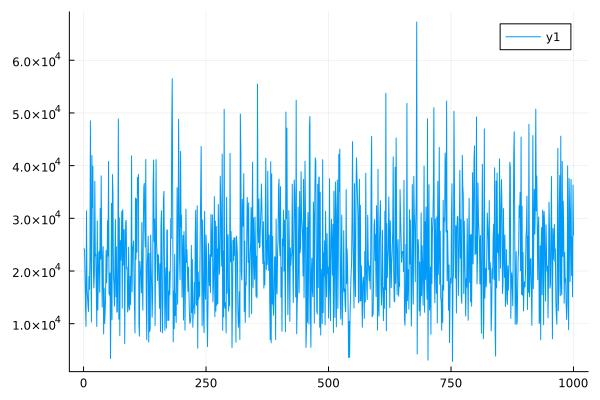

In [199]:
plot(loss_log)

In [176]:
Flux.train!(loss1, Flux.params(W1, b1), train_data, opt)

In [177]:
@show W1

W1 = [0.8526601897901432 1.8089781878686866 2.843352512230477 3.783402383418999 4.840248197918984; 4.797194978205234 3.7688514161715436 2.779565643803137 1.7445006592620482 0.808295954025268]


2×5 Matrix{Float64}:
 0.85266  1.80898  2.84335  3.7834  4.84025
 4.79719  3.76885  2.77957  1.7445  0.808296

In [178]:
@show b1

b1 = [1.3049211044422402, 0.9647066212655245]


2-element Vector{Float64}:
 1.3049211044422402
 0.9647066212655245

In [179]:
@show maximum(abs, W1 .- W_truth)

maximum(abs, W1 .- W_truth) = 0.2554993407379518


0.2554993407379518

In [188]:
fieldnames(typeof(model_to_fit))

()

In [184]:
sigmoid

σ (generic function with 2 methods)

In [181]:
σ


σ (generic function with 2 methods)

In [ ]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>

In [20]:
### <span style="color:orange"></span>

In [21]:
### <span style="color:orange"></span>

In [22]:
### <span style="color:orange"></span>

In [23]:
### <span style="color:orange"></span>

In [24]:
### <span style="color:orange"></span>

In [25]:
### <span style="color:orange"></span>

In [26]:
### <span style="color:orange"></span>

In [27]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>